## California Housing Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


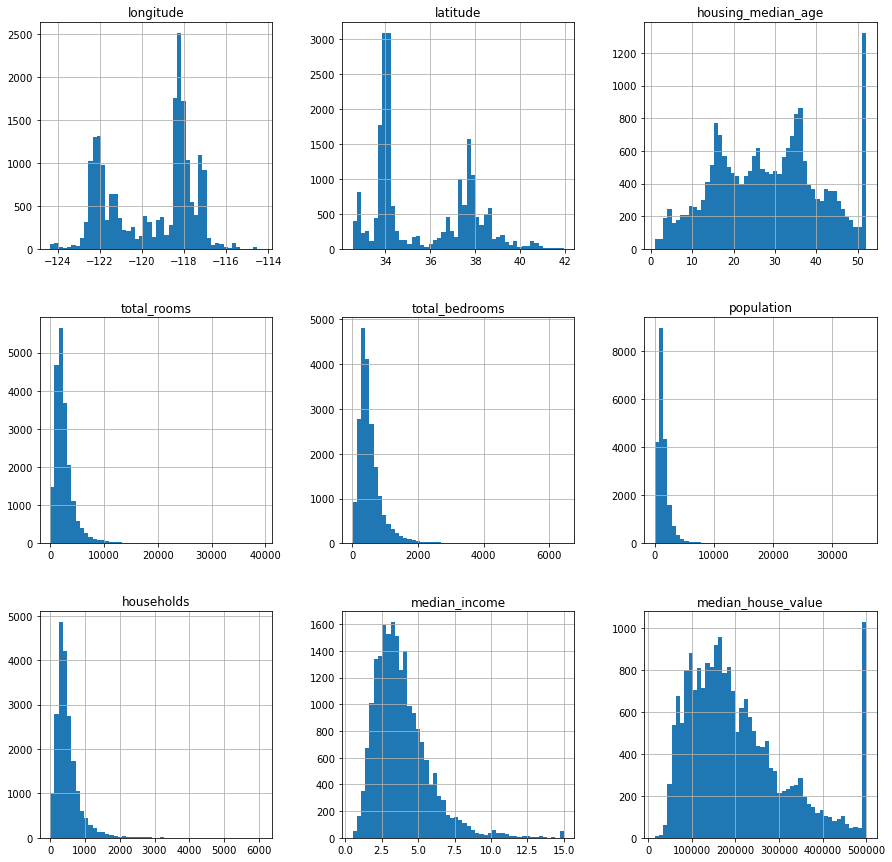

In [5]:
df.hist(bins=50,figsize=(15,15))
plt.show()

In [6]:
df.shape

(20640, 10)

No handles with labels found to put in legend.


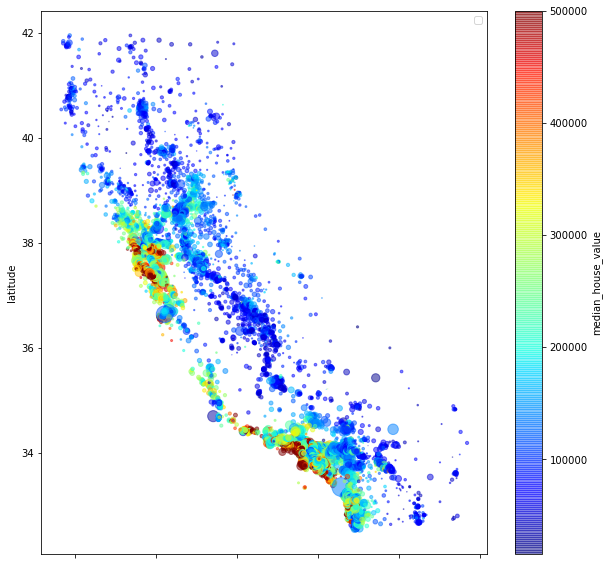

In [7]:
df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.5,figsize=(10,10),
        s=df['population']/100,c="median_house_value",cmap="jet")
plt.legend()

From this plot, we can observe that the price of a house is dependent upon the location(higher priced houses are near the sea)

In [8]:
corr_matrix=df.corr()

In [9]:
corr_matrix['median_house_value'].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [10]:
from pandas.plotting import scatter_matrix

<Figure size 1440x1440 with 0 Axes>

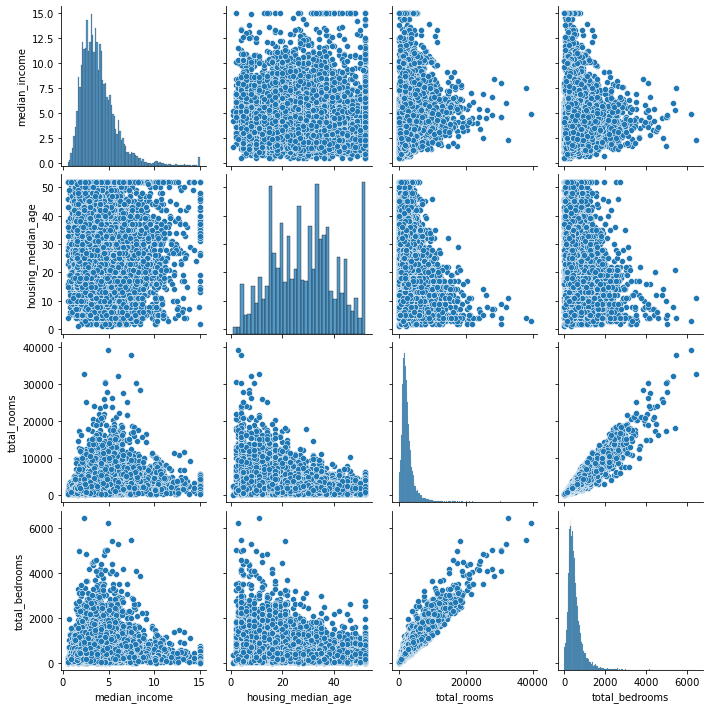

In [11]:
plt.figure(figsize=(20,20))
sns.pairplot(df[['median_income','housing_median_age','total_rooms','total_bedrooms']])

<AxesSubplot:>

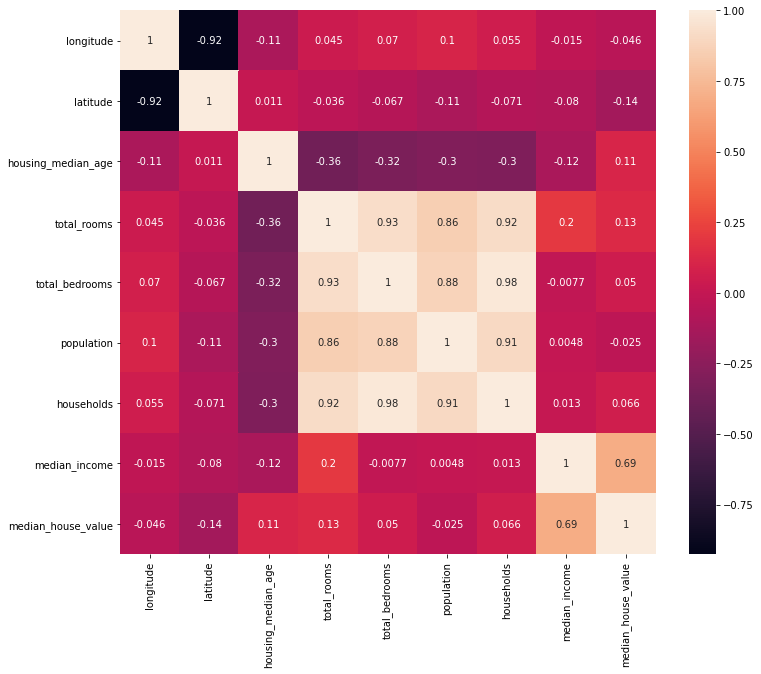

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [13]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [14]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [15]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
imputer=SimpleImputer(strategy="median")

In [18]:
df_num=df.drop(columns=["ocean_proximity"])
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [19]:
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [20]:
df_num.median().values

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [21]:
X=imputer.transform(df_num)

In [22]:
df=pd.DataFrame(X,columns=df_num.columns)

In [23]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [24]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler=MinMaxScaler()
trans=scaler.fit_transform(df.drop(columns=['median_house_value']))

In [27]:
trans=pd.DataFrame(trans,columns=df.columns[:-1])
trans

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776
...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
lr=LinearRegression()
X=trans[['median_income','households','total_rooms']]
y=df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
predictions=lr.predict(x_train)

In [32]:
from sklearn import metrics

In [33]:
print('MAE:', metrics.mean_absolute_error(y_train, predictions))
print('MSE:', metrics.mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print("R2:",metrics.r2_score(y_train,predictions))

MAE: 60311.448390045414
MSE: 6636042865.916412
RMSE: 81461.91052213551
R2: 0.501434028839025


In [34]:
residuals=predictions-y_train

C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

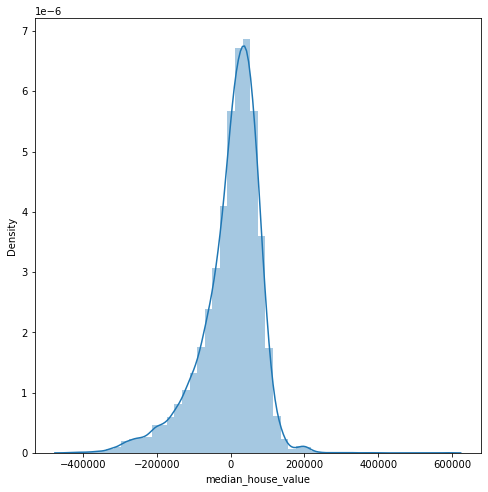

In [35]:
plt.figure(figsize=(8,8))
sns.distplot(residuals)

In [36]:
from sklearn.svm import SVR

In [37]:
svr=SVR()

In [38]:
svr.fit(x_train,y_train)

SVR()

In [39]:
predictions=svr.predict(x_test)


In [40]:
predictions
y_test

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15316    166100.0
14772     93600.0
12870    107000.0
13476    130700.0
16123    307100.0
Name: median_house_value, Length: 6812, dtype: float64

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R2:",metrics.r2_score(y_test,predictions))

MAE: 87885.26831337594
MSE: 13924703205.639603
RMSE: 118002.97964729366
R2: -0.044933868464241966


In [42]:
param_grid={"C":[0.01,0.1,10,100,1000],"gamma":[1,0.1,0.01,0.001],"kernel":["linear"]}

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [45]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................C=0.01, gamma=1, kernel=linear; total time=   5.3s
[CV 2/5] END .................C=0.01, gamma=1, kernel=linear; total time=   5.3s
[CV 3/5] END .................C=0.01, gamma=1, kernel=linear; total time=   5.3s
[CV 4/5] END .................C=0.01, gamma=1, kernel=linear; total time=   5.3s
[CV 5/5] END .................C=0.01, gamma=1, kernel=linear; total time=   5.3s
[CV 1/5] END ...............C=0.01, gamma=0.1, kernel=linear; total time=   5.3s
[CV 2/5] END ...............C=0.01, gamma=0.1, kernel=linear; total time=   5.3s
[CV 3/5] END ...............C=0.01, gamma=0.1, kernel=linear; total time=   5.3s
[CV 4/5] END ...............C=0.01, gamma=0.1, kernel=linear; total time=   5.3s
[CV 5/5] END ...............C=0.01, gamma=0.1, kernel=linear; total time=   5.3s
[CV 1/5] END ..............C=0.01, gamma=0.01, kernel=linear; total time=   5.3s
[CV 2/5] END ..............C=0.01, gamma=0.01, 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']},
             verbose=3)

In [48]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}

In [50]:
final_model=grid.best_estimator_

In [51]:
final_model.fit(x_train,y_train)

SVR(C=1000, gamma=1, kernel='linear')

In [52]:
final_pred=final_model.predict(x_test)

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test,final_pred))
print('MSE:', metrics.mean_squared_error(y_test, final_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred)))
print("R2:",metrics.r2_score(y_test,final_pred))

MAE: 64280.140691721856
MSE: 7914855746.101609
RMSE: 88965.47502318869
R2: 0.4060555035915754


In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
rsCV=RandomizedSearchCV(estimator=SVR(),param_distributions=param_grid,verbose=3)

In [56]:
rsCV.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   5.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   5.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   5.1s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   5.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   5.0s
[CV 1/5] END .................C=1000, gamma=1, kernel=linear; total time=   5.0s
[CV 2/5] END .................C=1000, gamma=1, kernel=linear; total time=   4.8s
[CV 3/5] END .................C=1000, gamma=1, kernel=linear; total time=   4.8s
[CV 4/5] END .................C=1000, gamma=1, kernel=linear; total time=   4.8s
[CV 5/5] END .................C=1000, gamma=1, kernel=linear; total time=   5.0s
[CV 1/5] END ..............C=1000, gamma=0.01, kernel=linear; total time=   5.0s
[CV 2/5] END ..............C=1000, gamma=0.01, k

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': [0.01, 0.1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['linear']},
                   verbose=3)

In [57]:
rsCV.best_params_

{'kernel': 'linear', 'gamma': 1, 'C': 1000}

In [59]:
rscv_model=rsCV.best_estimator_

In [60]:
rscv_model.fit(x_train,y_train)

SVR(C=1000, gamma=1, kernel='linear')

In [61]:
rscv_pred=rscv_model.predict(x_test)

In [62]:
def printErrorMetrics(y_test,final_pred):
    print('MAE:', metrics.mean_absolute_error(y_test,final_pred))
    print('MSE:', metrics.mean_squared_error(y_test, final_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, final_pred)))
    print("R2:",metrics.r2_score(y_test,final_pred))

In [63]:
printErrorMetrics(y_test,rscv_pred)

MAE: 64280.140691721856
MSE: 7914855746.101609
RMSE: 88965.47502318869
R2: 0.4060555035915754
